In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import gmaps
import requests
import scipy.stats as stats
from scipy.stats import linregress
#from api_key import api_key

# Comparison of Number of Traffic Accidents per Weather Condition in San Antonio, TX.

The question: What is the best weather condition to drive in?

The Hypothesis: The worse the weather conditions, the more accidents that occur.

## Dataset: US Accidents (4.2 million records)
Source:https://www.kaggle.com/sobhanmoosavi/us-accidents

Description: Reported accidents over US from 2016-Dec 2020, includes location of accident, date of the occurance, weather at time of the accident, and other variables.

## Cleaned CSV: cleaned_2018_texas_accidents.csv
Data Extrapilated: Accidents that occurred in Texas in 2018, including the weather, location and time of occurance.

Refer to cleaning_csv.ipynb

In [2]:
csv_read = pd.read_csv("../cleaned_2018_texas_accidents.csv")
texas_accidents_df = pd.DataFrame(csv_read)
texas_accidents_df.head()

,Unnamed: 0,Time,Latitude,Longitude,City,County,State,Zipcode,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Year,Month,Day
0,195997,2018-11-30 04:04:00,29.354069,-98.400734,San Antonio,Bexar,TX,78222,66.9,90.0,29.79,8.0,4.6,0.0,Overcast,2018,11,30
1,195998,2018-11-30 04:03:22,29.452906,-98.501022,San Antonio,Bexar,TX,78212-3329,64.9,97.0,29.79,3.0,6.9,0.0,Overcast,2018,11,30
2,196000,2018-11-30 04:03:04,29.483614,-98.403198,San Antonio,Bexar,TX,78218,64.9,97.0,29.79,3.0,6.9,0.0,Overcast,2018,11,30
3,196019,2018-11-30 11:03:46,29.494801,-98.535782,San Antonio,Bexar,TX,78213-3947,68.0,87.0,29.79,10.0,8.1,0.0,Light Drizzle,2018,11,30
4,196021,2018-11-30 11:15:14,29.493256,-98.499268,San Antonio,Bexar,TX,78216-7205,68.0,87.0,29.79,10.0,8.1,0.0,Light Drizzle,2018,11,30


#### Pulled out accidents that only occured with San Antonio

Grouped by weather condition to get count of accidents.

In [3]:
# san antonio accident data
sa_df = texas_accidents_df.loc[texas_accidents_df['City']=='San Antonio']
sa_weather1 = sa_df.groupby('Weather_Condition')
sa_weather = sa_weather1['Time'].count()
sa_weather

Weather_Condition
Clear                            17
Fog                               5
Haze                              1
Heavy Rain                       30
Heavy Thunderstorms and Rain     15
Light Drizzle                    65
Light Freezing Rain               9
Light Rain                      379
Light Snow                        3
Light Thunderstorms and Rain     23
Mostly Cloudy                    41
Overcast                        200
Partly Cloudy                     6
Rain                             36
Scattered Clouds                 10
Thunderstorm                      3
Thunderstorms and Rain           11
Name: Time, dtype: int64

## Charts based on data

Chart I: Bar chart showing the number of accidents per weather condition.

In [4]:
x_axis = sa_weather.index.to_list

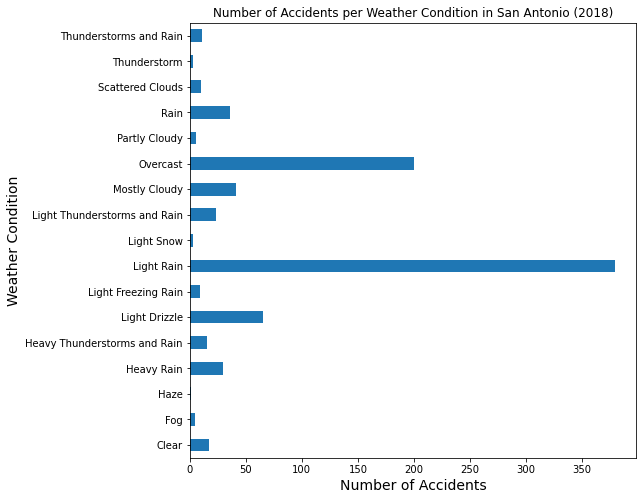

In [11]:
sa_weather_chart = sa_weather.plot.barh(x=x_axis, figsize=(8, 8), title='Number of Accidents per Weather Condition in San Antonio (2018)')
sa_weather_chart.set_xlabel("Number of Accidents", fontsize=14)
sa_weather_chart.set_ylabel("Weather Condition", fontsize=14)
plt.savefig("Images/accident_per_weather_bar.png")
plt.show()

### Accidents based on visibility conditions

Grouped dataframe based on visibility column for charting.

In [41]:
sa_visibility = sa_df.groupby('Visibility(mi)')
sa_visibility = sa_visibility['Time'].count()
sa_visibility


Visibility(mi)
0.1      17
0.2       8
0.4       1
0.5       7
0.8      12
0.9       1
1.0      21
1.2       1
1.5       8
1.8      11
2.0      51
2.5      11
3.0      53
4.0      50
5.0      44
6.0      40
7.0      44
8.0      41
9.0      24
10.0    409
Name: Time, dtype: int64

Chart II: Number of Accidents based on visibility.

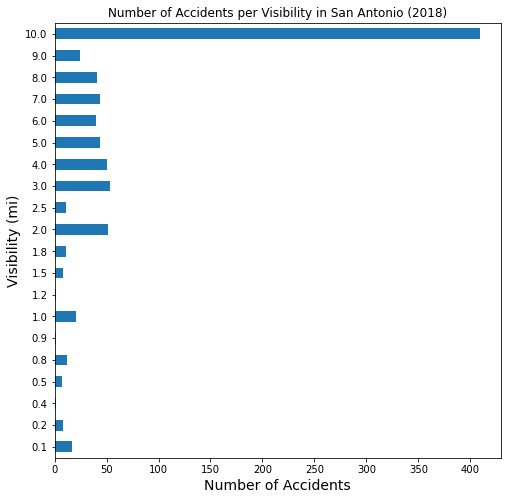

In [42]:
#Charting with pandas
x_axis2 = sa_visibility.index.to_list
sa_visib_chart = sa_visibility.plot.barh(x=x_axis2, figsize=(8,8), title="Number of Accidents per Visibility in San Antonio (2018)")
sa_visib_chart.set_xlabel("Number of Accidents", fontsize=14)
sa_visib_chart.set_ylabel("Visibility (mi)", fontsize=14)
plt.savefig("Images/accident_per_visibility_bar.png")
plt.show()

### Accidents based on precipitation conditions

Grouped dataframe based on precipitation column for charting.

In [50]:
#Grouping original dataframe by precipitation column
group_by_prec = sa_df.groupby('Precipitation(in)')
sa_precipitation = group_by_prec.count()
y_axis2 = sa_precipitation.index.to_list()
sa_precipitation = sa_precipitation['Time'].tolist()

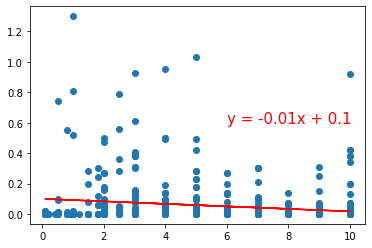

In [64]:
x_values = sa_df['Visibility(mi)']
y_values = sa_df['Precipitation(in)']
plt.scatter(x_values, y_values, marker='o')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,0.6),fontsize=15,color="red")
plt.show()

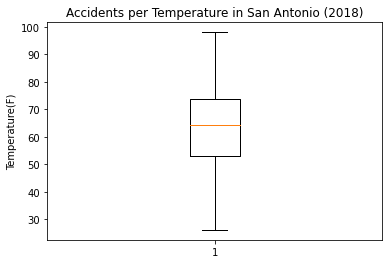

In [55]:
fig1, ax1 = plt.subplots()
ax1.set_title('Accidents per Temperature in San Antonio (2018)')
ax1.set_ylabel('Temperature(F)')
ax1.boxplot(sa_df['Temperature(F)'])
plt.show()

### Accidents based on temperature

Grouped dataframe based on temperature column for charting.

In [25]:
# grouping original dataframe by temperature.
sa_temp = sa_df.groupby('Temperature(F)')
temp_count = sa_temp['Time'].count()
print(temp_count)
print(sa_df['Temperature(F)'].max())

Temperature(F)
26.1     3
27.0    10
27.9     1
28.0     2
28.2     2
        ..
91.0     4
91.8     2
93.9     3
96.1     1
98.1     1
Name: Time, Length: 135, dtype: int64
98.1


In [78]:
bins = [0,20,40,60,80,100]
labels = ['0-20','21-40','41-60','61-80','81-100']
sa_df['Bins'] = pd.cut(sa_df['Temperature(F)'], bins=bins, labels=labels, include_lowest=True)


C:\Users\Courtney\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


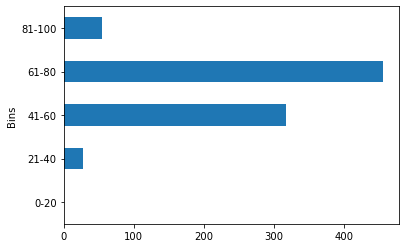

In [79]:
temp_group = sa_df.groupby(['Bins'])
temp_group = temp_group['Time'].count()
temp_group.plot.barh()


In [72]:
len(sa_df)

854

In [66]:
data =sa_weather1['Time'].count()

In [67]:
type(data)

pandas.core.series.Series

In [73]:
weather_conditions = pd.DataFrame({
    'Observed':data,
    'Expected': 50
})
weather_conditions

,Observed,Expected
Weather_Condition,,
Clear,17,50
Fog,5,50
Haze,1,50
Heavy Rain,30,50
Heavy Thunderstorms and Rain,15,50
Light Drizzle,65,50
Light Freezing Rain,9,50
Light Rain,379,50
Light Snow,3,50


In [74]:
critical_value = stats.chi2.ppf(q = 0.95, df = 16)

In [75]:
critical_value

26.29622760486423

In [76]:
stats.chisquare(weather_conditions['Observed'], weather_conditions['Expected'])

Power_divergenceResult(statistic=3005.3599999999997, pvalue=0.0)